<a href="https://colab.research.google.com/github/Sookchand/LinearClassification/blob/main/Machine_Learning_and_Neurons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## More Details
The main difference between ScikitLearn and Keras is that we are resposible for building the model

1. The Architure of the model(the equation to go from input to prediction)
2. How is this model trained:
  * Cost/loss/error function
  * Gradient decent to maximise cost

# What is a line?
1. This is just like the usual "y = mx + b"
2. But for 2-D classification:
  * The horizontal axis is x1
  * The vertical axis is x2
  * It's more conventional to arrange the equation as follows
    (even though it could be written as x2 = mx1 + b)
    w1x1 + w2x2 + b = 0

# The Decision rule
How do we use the line to classify?

a = w1x1 + w2x2 + b

if a >= 0 predict ---> 1

if a <= 0 predict ---> 0


# The Decision Rule
* Can be more compactly written as:

y = u(a), a = w1x1 + w2x2 + b

* In deep learning we prefer smooth diferential function("sigmoid"):

y = q(a), a = w1x1 + w2x2 + b


# Probablistic Interpretation
* We normally interpret the output as "the probabbility that y = 1 given x"
* To make the prediction we round:
  * if p(y=1 | x) > 50% ---> predict 1, else 0
* The "S-shaped" curve is called a sigmoid.
* The model is called Logistic Regression.
* Sigmoid = Logistic Function.
* Its argument is called "logit", although a more modern name is called "activation"

p(y=1 | x) = q(w1x1 + w2x2 + b)

# Logistic Regression with 2 > inputs
* WHat if we have > 2 inputs like 100 or 1000, etc
* No problem! Just use what we know about matirces and vectors

p(y=1 | x) = q(W^t x + b) = 

Load in the data

In [3]:
import tensorflow as tf

In [4]:
from sklearn.datasets import load_breast_cancer

In [5]:
# Load the data
data = load_breast_cancer()

In [6]:
# Check the type of the data
type(data)

sklearn.utils.Bunch

In [7]:
# Note this is a bunch object
# this is basically like a dictionary where you can treat the keys like attributes
data.keys()


dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [8]:
# Data (the attributes) means the input data
data.data.shape
# it has 569 samples, 30 features

(569, 30)

In [9]:
# target
data.target
# The target is 0s and 1s
# normaly when you have k targets they are label 0..k-1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [10]:
# their meaning is not lost
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [11]:
# there are alos 569 coresponding target
data.target.shape

(569,)

In [12]:
# You can also determine the input of each feature name
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [13]:
# Going to split the data into train and test
from sklearn.model_selection import train_test_split

# split the data into train and tes sets
x_train, x_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33)
N, D = x_train.shape

In [14]:
# scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [15]:
# Now all the fun tensorflow stuff
# Build the model

model = tf.keras.models.Sequential([
                                    tf.keras.layers.Input(shape=(D,)),
                                    tf.keras.layers.Dense(1, activation="sigmoid")
])
# Alternatively
# model = tf.keras.models.sequential()
# model.add(tf.keras.layers.Dense(1, input_shape(D,), activation = "sigmoid"))

model.compile(optimizer="Adam",
              loss = "binary_crossentropy",
              metrics = "accuracy")

# train the model
r = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 100)

#Evaluate the model - evaluate() returns loss and accuracy
print("Train Score:", model.evaluate(x_train, y_train))
print ("Test Score:", model.evaluate(x_test, y_test))


Epoch 1/100
12/12 [==============================] - 0s 14ms/step - loss: 0.5183 - accuracy: 0.7822 - val_loss: 0.4713 - val_accuracy: 0.8511
Epoch 2/100
12/12 [==============================] - 0s 3ms/step - loss: 0.4726 - accuracy: 0.8163 - val_loss: 0.4287 - val_accuracy: 0.8883
Epoch 3/100
12/12 [==============================] - 0s 3ms/step - loss: 0.4350 - accuracy: 0.8320 - val_loss: 0.3934 - val_accuracy: 0.8883
Epoch 4/100
12/12 [==============================] - 0s 3ms/step - loss: 0.4030 - accuracy: 0.8583 - val_loss: 0.3644 - val_accuracy: 0.8936
Epoch 5/100
12/12 [==============================] - 0s 3ms/step - loss: 0.3766 - accuracy: 0.8819 - val_loss: 0.3403 - val_accuracy: 0.9043
Epoch 6/100
12/12 [==============================] - 0s 3ms/step - loss: 0.3538 - accuracy: 0.9055 - val_loss: 0.3199 - val_accuracy: 0.9149
Epoch 7/100
12/12 [==============================] - 0s 3ms/step - loss: 0.3342 - accuracy: 0.9134 - val_loss: 0.3030 - val_accuracy: 0.9255
Epoch 8/100


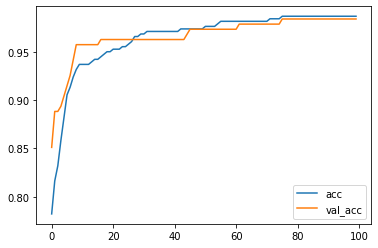

In [16]:
import matplotlib.pyplot as plt
# plot the accuracy
plt.plot(r.history["accuracy"], label = "acc")
plt.plot(r.history["val_accuracy"], label = "val_acc")
plt.legend()

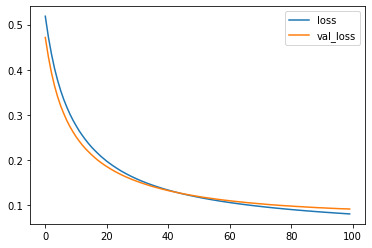

In [17]:
plt.plot(r.history["loss"], label = "loss")
plt.plot(r.history["val_loss"], label = "val_loss")
plt.legend()

In [18]:
p = model.predict(x_test)
print(p) # they are ouputs of the sigmoid interpreted as probabilities p(y = 1 | x)
# Round to get the actual predictions
# note: has to be flattened since the target are size (N, ) while predictions are size (N, 1)

[[9.8042828e-01]
 [9.8385167e-01]
 [9.7923553e-01]
 [9.9615622e-01]
 [9.3330956e-01]
 [9.2871475e-01]
 [9.9139869e-01]
 [9.8863427e-05]
 [2.3820400e-03]
 [6.8772209e-01]
 [8.8608968e-01]
 [9.9993503e-01]
 [2.1841621e-05]
 [8.4810716e-05]
 [8.0462290e-05]
 [9.9928862e-01]
 [4.2993724e-03]
 [6.0078502e-04]
 [9.9918753e-01]
 [9.9988616e-01]
 [8.7636924e-01]
 [9.9664807e-01]
 [2.9533952e-02]
 [9.9606895e-01]
 [9.9882412e-01]
 [4.5705438e-03]
 [1.2788177e-04]
 [6.3561881e-01]
 [6.5677142e-01]
 [5.4545628e-05]
 [8.7007391e-01]
 [1.5556812e-04]
 [9.4720572e-01]
 [9.9856853e-01]
 [1.3744122e-01]
 [3.1285584e-03]
 [9.6275723e-01]
 [1.8303983e-05]
 [9.6769333e-03]
 [9.9706602e-01]
 [8.0009699e-03]
 [9.9367142e-01]
 [1.7686787e-05]
 [9.9966735e-01]
 [1.4710426e-04]
 [8.2662135e-01]
 [9.9861449e-01]
 [1.0380632e-05]
 [9.9278688e-01]
 [3.0197236e-06]
 [9.8196268e-01]
 [8.3724904e-01]
 [8.0347061e-04]
 [8.6623132e-03]
 [9.8978281e-01]
 [9.8850715e-01]
 [2.2466421e-02]
 [9.6994531e-01]
 [8.1608295e-0

In [19]:
import numpy as np
p = np.round(p).flatten()
print(p)

[1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1.
 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0.
 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0.
 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0.
 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1.
 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0.
 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1.]


In [20]:
# Calculate the accuracy, compare it to evaluate()output
print("Manaual caluculated accuracy:", np.mean(p == y_test))
print("Evaluate output:", model.evaluate(x_test, y_test))

Manaual caluculated accuracy: 0.9840425531914894
6/6 [==============================] - 0s 2ms/step - loss: 0.0916 - accuracy: 0.9840
Evaluate output: [0.0915863960981369, 0.9840425252914429]


In [21]:
# Lets save the mdoel to the file
model.save("linearclassifier.h5")

In [24]:
# Check that the model file exist
!ls -lh

total 24K
-rw-r--r-- 1 root root  19K Oct 26 20:49 linearclassifier.h5
drwxr-xr-x 1 root root 4.0K Oct 14 16:31 sample_data


In [25]:
# Lets load the model and confirm that it still works
model = tf.keras.models.load_model("linearclassifier.h5")
print(model.layers)
model.evaluate(x_test, y_test)

6/6 [==============================] - 0s 1ms/step - loss: 0.0916 - accuracy: 0.9840


[0.0915863960981369, 0.9840425252914429]